In [ ]:
# Подключение Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 56.5 MB/s eta 0:00:00


In [ ]:
# Импорт необходимых библиотек
import shutil
import os
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import gdown
from ultralytics import YOLO

In [ ]:
# Пути к архивам на Google drive
archive_paths = [
    '/content/drive/MyDrive/proplex_new_out.mark.2024.09.18.zip',
]

# Папка, куда будут распакованы архивы
output_dir = '/content/dataset'

# Распаковка архивов
for archive_path in archive_paths:
    shutil.unpack_archive(archive_path, output_dir)

# Задание имени рабочего каталога
DATASET_PATH = '/content/dataset/'

In [ ]:
# Определение путей к существующим папкам train, val и test
TRAIN_IMAGES_PATH = os.path.join(DATASET_PATH, 'train', 'images')
TRAIN_LABELS_PATH = os.path.join(DATASET_PATH, 'train', 'labels')
VAL_IMAGES_PATH = os.path.join(DATASET_PATH, 'val', 'images')
VAL_LABELS_PATH = os.path.join(DATASET_PATH, 'val', 'labels')
TEST_IMAGES_PATH = os.path.join(DATASET_PATH, 'test', 'images')
TEST_LABELS_PATH = os.path.join(DATASET_PATH, 'test', 'labels')

# Проверка существования директорий
assert os.path.exists(TRAIN_IMAGES_PATH), f"Папка {TRAIN_IMAGES_PATH} не существует"
assert os.path.exists(TRAIN_LABELS_PATH), f"Папка {TRAIN_LABELS_PATH} не существует"
assert os.path.exists(VAL_IMAGES_PATH), f"Папка {VAL_IMAGES_PATH} не существует"
assert os.path.exists(VAL_LABELS_PATH), f"Папка {VAL_LABELS_PATH} не существует"
assert os.path.exists(TEST_IMAGES_PATH), f"Папка {TEST_IMAGES_PATH} не существует"
assert os.path.exists(TEST_LABELS_PATH), f"Папка {TEST_LABELS_PATH} не существует"

# Создание YAML-файла с конфигурацией для YOLO
yaml_text = f'''
train: {TRAIN_IMAGES_PATH}
val: {VAL_IMAGES_PATH}
# test: {TEST_IMAGES_PATH}  # Можно раскомментировать, если требуется

число классов:
cl: 2

названия классов:
names: ['Good_mark', 'Bad_mark']
'''

# Запись YAML-конфигурации в файл
YAML_PATH = os.path.join(DATASET_PATH, 'data.yaml')
with open(YAML_PATH, 'w') as f:
    f.write(yaml_text)

print("Файл data.yaml создан успешно.")

Файл data.yaml создан успешно.


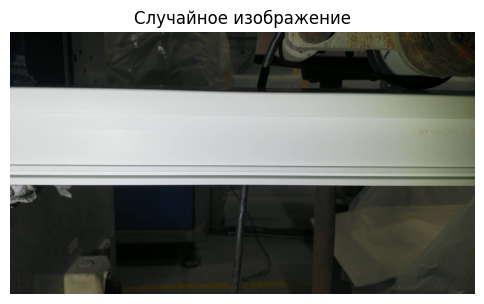

In [ ]:
# Визуализация случайных экземляров из тренировочной выборки
# Выбор случайного изображения
random_image_filename = random.choice(os.listdir(TRAIN_IMAGES_PATH))
image_path = os.path.join(TRAIN_IMAGES_PATH, random_image_filename)

# Отображение случайного изображения
image = Image.open(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title("Случайное изображение")
plt.axis('off')
plt.show()

['1 0.9342716942148761 0.38360881542699715 0.1314566115702478 0.02892561983471069\n']


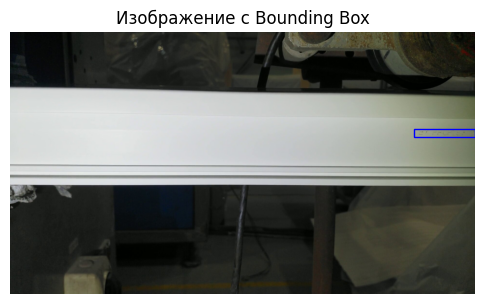

In [ ]:
# Получение соответствующего файла с координатами
label_filename = os.path.splitext(random_image_filename)[0] + '.txt'
label_path = os.path.join(TRAIN_LABELS_PATH, label_filename)

if os.path.exists(label_path):
    # Чтение координат из файла
    with open(label_path, 'r') as label_file:
        lines = label_file.readlines()
    print(lines)
    # Отображение изображения с bounding box
    plt.figure(figsize=(6, 6))
    plt.imshow(image)

    for line in lines:
        item = line.strip().split()[0]
        values = line.strip().split()[1:]
        if len(values) == 4:
            x, y, width, height = map(float, values)
            x *= image.width
            y *= image.height
            width *= image.width
            height *= image.height
            rect = plt.Rectangle((x - width / 2, y - height / 2), width, height,
                                 linewidth=1,
                                 edgecolor='r' if item=='0' else 'b',
                                 facecolor='none')
            plt.gca().add_patch(rect)

    plt.title("Изображение с Bounding Box")
    plt.axis('off')
    plt.show()
else:
    print('Объектов на изображении нет')

In [ ]:
# Инициализация и обучение модели Ultralytics YOLOv10
# Создаем объект модели
model = YOLO('yolov10s.pt')

# Запуск процесса обучения
results = model.train(data=YAML_PATH, epochs=150, project='drive/MyDrive/Обучение Yolo_mark', name='Marking', exist_ok=False)

# Вывод доступных атрибутов в объекте results
print(dir(results))

# Если результатом являются классы, можно также вывести их содержимое
for attr in dir(results):
    print(f"{attr}: {getattr(results, attr)}")


Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/dataset/data.yaml, epochs=150, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=drive/MyDrive/Обучение Yolo_mark, name=Marking2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=

100%|██████████| 755k/755k [00:00<00:00, 104MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1     36096  ultralytics.nn.modules.block.SCDown          [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1    137728  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 290MB/s]

WARNING ⚠️ yolo11n.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 78.3 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.3s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 645 images, 0 backgrounds, 0 corrupt: 100%|██████████| 645/645 [00:00<00:00, 1636.71it/s]


train: New cache created: /content/dataset/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/val/labels... 79 images, 0 backgrounds, 0 corrupt: 100%|██████████| 79/79 [00:00<00:00, 1368.73it/s]

val: New cache created: /content/dataset/val/labels.cache


Plotting labels to drive/MyDrive/Обучение Yolo_mark/Marking2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to drive/MyDrive/Обучение Yolo_mark/Marking2
Starting training for 150 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/150      5.25G      6.168      44.28      4.112          9        640: 100%|██████████| 41/41 [00:22<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all         79         80      0.164       0.35      0.148     0.0634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/150       5.2G       3.57      4.137      2.789          9        640: 100%|██████████| 41/41 [00:20<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all         79         80      0.429       0.36      0.349      0.103



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/150       5.2G      3.588       3.14      2.792         11        640: 100%|██████████| 41/41 [00:20<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         79         80      0.441      0.263      0.225     0.0885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/150      5.18G       3.41      2.873      2.752         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]

                   all         79         80      0.177      0.025     0.0242    0.00558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/150      5.21G      3.323      2.648      2.701          5        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.86it/s]

                   all         79         80      0.499      0.613      0.716      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/150       5.2G      3.355      2.474      2.712         15        640: 100%|██████████| 41/41 [00:19<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         79         80      0.662      0.722      0.757      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/150      5.21G      3.327      2.436      2.595         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.79it/s]

                   all         79         80      0.609      0.722      0.716      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/150      5.18G      3.081      2.359      2.523         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]

                   all         79         80      0.596       0.75      0.719      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/150      5.21G      2.993      2.192      2.442          9        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         79         80      0.823      0.325      0.578      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/150       5.2G      2.909       2.01      2.379         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]

                   all         79         80      0.715      0.825      0.857      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/150       5.2G      2.798      1.955      2.366         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.90it/s]

                   all         79         80      0.774      0.784      0.853      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/150      5.34G      2.737      1.867      2.289         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.86it/s]

                   all         79         80      0.801      0.691      0.838      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/150      5.21G      2.751      1.869      2.289         13        640: 100%|██████████| 41/41 [00:18<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]

                   all         79         80      0.769      0.839      0.907      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/150       5.2G      2.697      1.806       2.23         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]

                   all         79         80      0.715       0.75      0.787      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/150       5.2G      2.723      1.707      2.235         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         79         80      0.791      0.887      0.918      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/150      5.34G       2.65       1.68      2.258          9        640: 100%|██████████| 41/41 [00:19<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         79         80      0.623       0.75      0.752      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/150      5.21G      2.756      1.708      2.288         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.73it/s]

                   all         79         80      0.887      0.923      0.955      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/150       5.2G      2.658      1.703      2.226         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         79         80      0.875      0.825      0.893      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/150       5.2G      2.612      1.587      2.196          9        640: 100%|██████████| 41/41 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.45it/s]

                   all         79         80      0.908      0.866      0.948      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/150      5.18G      2.584      1.563      2.163         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]

                   all         79         80      0.886      0.875      0.952      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/150      5.21G        2.5      1.582      2.149         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         79         80      0.892      0.934      0.975      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/150       5.2G       2.57      1.628      2.175          6        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         79         80      0.849      0.912      0.955      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/150      5.21G      2.487       1.55      2.166         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.75it/s]

                   all         79         80      0.912      0.938      0.976      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/150      5.34G       2.59      1.556      2.119         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         79         80      0.828      0.859      0.909       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/150      5.21G      2.627      1.648      2.191          9        640: 100%|██████████| 41/41 [00:18<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]

                   all         79         80       0.88      0.921      0.949      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/150       5.2G      2.444      1.483      2.113          7        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all         79         80      0.924      0.887      0.976      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/150       5.2G      2.425      1.509      2.138         14        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.02it/s]

                   all         79         80      0.856      0.938      0.952      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/150      5.18G      2.482      1.482      2.142          7        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.56it/s]

                   all         79         80      0.852      0.999      0.981      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/150      5.21G      2.404      1.545      2.105         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         79         80      0.933      0.869      0.953      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/150       5.2G      2.436      1.497      2.084         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         79         80      0.838       0.92      0.939      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/150       5.2G      2.349      1.496      2.087         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all         79         80      0.908      0.957      0.971      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/150      5.18G      2.304      1.417      2.062          7        640: 100%|██████████| 41/41 [00:19<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.98it/s]

                   all         79         80      0.912      0.923      0.979      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/150      5.21G      2.345        1.4       2.05          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         79         80      0.847      0.907      0.952       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/150       5.2G      2.315      1.394      2.053         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]

                   all         79         80      0.898        0.9      0.969      0.742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/150      5.21G       2.23      1.341      2.023         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.72it/s]

                   all         79         80       0.97      0.946      0.993      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/150      5.18G      2.259      1.339      2.042         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.15it/s]


                   all         79         80      0.887       0.98      0.986      0.732

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/150      5.21G      2.269      1.349      2.026         11        640: 100%|██████████| 41/41 [00:18<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]

                   all         79         80      0.911      0.938      0.981      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/150       5.2G      2.279      1.311      2.037          8        640: 100%|██████████| 41/41 [00:18<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         79         80      0.877      0.941      0.965      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/150       5.2G      2.289      1.443      2.031         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.01it/s]

                   all         79         80       0.88      0.812      0.928      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/150      5.18G      2.237      1.374      2.004         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         79         80      0.881        0.9      0.959       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/150      5.21G      2.276       1.39      2.028         14        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         79         80      0.944      0.912      0.977      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/150       5.2G      2.273      1.291      2.015         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.76it/s]

                   all         79         80      0.929      0.938      0.965      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/150       5.2G        2.3      1.362      2.049          7        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         79         80      0.965      0.861      0.931      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/150      5.34G      2.243      1.338      2.001         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         79         80      0.933      0.972      0.989      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/150      5.21G      2.211      1.298      1.987         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         79         80      0.939      0.892       0.96      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/150       5.2G      2.223      1.275      1.974          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         79         80      0.894      0.969      0.987      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/150       5.2G      2.163      1.215      1.993         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         79         80      0.938      0.944      0.982      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/150      5.18G      2.158      1.234      2.013          6        640: 100%|██████████| 41/41 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         79         80      0.962      0.932      0.984      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/150      5.21G      2.188      1.243      1.975         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         79         80      0.973      0.883      0.981      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/150       5.2G      2.188      1.253      1.961         12        640: 100%|██████████| 41/41 [00:18<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         79         80      0.965      0.896      0.981      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/150      5.21G      2.135      1.191      1.971         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         79         80      0.908      0.985      0.982      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/150      5.18G      2.122      1.172      1.959         14        640: 100%|██████████| 41/41 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.39it/s]

                   all         79         80      0.969      0.963      0.988      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/150      5.21G      2.129      1.269       1.95          9        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.32it/s]

                   all         79         80      0.948      0.978      0.988      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/150       5.2G      2.135      1.222      1.974          9        640: 100%|██████████| 41/41 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.59it/s]

                   all         79         80      0.988       0.92      0.984      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/150       5.2G      2.105      1.218      1.945         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]

                   all         79         80      0.948      0.947      0.975       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/150      5.18G      2.085      1.216      1.968          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]

                   all         79         80      0.936      0.972      0.991      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/150      5.21G      2.108      1.159      1.935          7        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         79         80      0.972      0.922      0.987      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/150      5.21G       2.15      1.197      1.944         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all         79         80       0.93      0.964      0.984      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/150       5.2G      2.112      1.174      1.963          9        640: 100%|██████████| 41/41 [00:19<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.09it/s]

                   all         79         80       0.96      0.944      0.984      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/150      5.34G      2.024      1.162       1.91          6        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.62it/s]

                   all         79         80      0.938      0.946      0.988      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/150      5.21G      2.019      1.108       1.92         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all         79         80      0.972      0.982      0.994      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/150       5.2G      1.989      1.131      1.921         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         79         80      0.915      0.967      0.985      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/150      5.21G      2.033       1.15      1.943         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.47it/s]

                   all         79         80      0.962      0.993      0.993      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/150      5.34G      1.997      1.111      1.902         14        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.18it/s]


                   all         79         80      0.966      0.951      0.988      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/150      5.21G      2.033      1.122      1.893         14        640: 100%|██████████| 41/41 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all         79         80      0.935      0.966      0.986      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/150       5.2G      2.002      1.141      1.931          9        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.60it/s]

                   all         79         80      0.976      0.991      0.995      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/150       5.2G       2.02      1.145      1.935         14        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         79         80      0.945      0.975      0.987      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/150      5.18G       2.02      1.095      1.895         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.19it/s]

                   all         79         80      0.938      0.993       0.99       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/150      5.21G      2.067      1.172      1.911         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.00it/s]

                   all         79         80      0.976      0.936      0.986      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/150       5.2G      1.958      1.068      1.893         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.54it/s]

                   all         79         80      0.946      0.988      0.991      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/150      5.21G      2.004      1.122      1.909         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.91it/s]

                   all         79         80      0.992      0.957      0.993      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/150      5.18G      1.899      1.078      1.866         11        640: 100%|██████████| 41/41 [00:18<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.88it/s]

                   all         79         80      0.975      0.973      0.992      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/150      5.21G       1.88      1.058      1.874         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]

                   all         79         80      0.951      0.957       0.99       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/150       5.2G       1.94      1.082      1.909          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         79         80      0.929      0.975      0.987       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/150       5.2G      1.921      1.072      1.903         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         79         80      0.974          1      0.994      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/150      5.18G      1.977      1.084      1.893         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         79         80      0.976      0.948      0.991      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/150      5.21G      1.901      1.067      1.884          9        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         79         80      0.975      0.931      0.995      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/150       5.2G      1.973      1.109      1.871         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]

                   all         79         80      0.981       0.92      0.985      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/150       5.2G      1.881      1.082      1.871         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         79         80      0.886      0.969      0.973      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/150      5.18G      1.916      1.098      1.845         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.35it/s]

                   all         79         80      0.949       0.99      0.993      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/150      5.21G       1.88      1.015      1.896         15        640: 100%|██████████| 41/41 [00:19<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         79         80      0.978      0.946      0.989      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/150       5.2G       1.88      1.079      1.884          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.50it/s]

                   all         79         80      0.968      0.934       0.98      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/150      5.21G      1.851      1.053      1.879         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         79         80      0.954      0.991      0.992        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/150      5.34G       1.82      1.046      1.847         14        640: 100%|██████████| 41/41 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]

                   all         79         80       0.99       0.92      0.982      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/150      5.21G      1.814      1.007      1.829          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         79         80       0.94       0.95      0.982      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/150       5.2G       1.84      1.041       1.87          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         79         80      0.964      0.927      0.981      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/150       5.2G      1.865      1.086      1.865          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         79         80       0.96      0.975      0.992      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/150      5.18G      1.832      1.028      1.861          9        640: 100%|██████████| 41/41 [00:20<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]

                   all         79         80      0.933          1       0.99      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/150      5.21G      1.781     0.9649      1.856         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

                   all         79         80      0.933      0.963       0.99      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/150       5.2G      1.885      1.009      1.879          9        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.34it/s]

                   all         79         80      0.949      0.964      0.989      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/150      5.21G      1.772     0.9941      1.869         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         79         80      0.966      0.984      0.986      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/150      5.18G      1.816     0.9908      1.865         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.30it/s]

                   all         79         80      0.937      0.988      0.992      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/150      5.21G      1.769     0.9691      1.846          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         79         80      0.948          1      0.983      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/150       5.2G      1.758     0.9931      1.854         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]

                   all         79         80       0.95      0.975      0.992      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/150      5.21G      1.773     0.9726      1.812         15        640: 100%|██████████| 41/41 [00:19<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         79         80      0.931      0.961      0.982      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/150      5.34G      1.823     0.9705      1.854         17        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         79         80          1      0.945      0.991       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/150      5.21G       1.75     0.9873      1.821         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         79         80      0.971      0.988      0.995      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/150       5.2G       1.82     0.9938      1.857          5        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         79         80      0.975      0.974      0.993      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/150       5.2G      1.732     0.9158      1.853         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         79         80      0.962      0.975      0.989      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/150      5.34G      1.736      0.936      1.829          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         79         80      0.964      0.975      0.992       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/150      5.21G       1.74     0.9444      1.831          7        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.31it/s]


                   all         79         80      0.954      0.988      0.989      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/150       5.2G      1.673     0.9186      1.825         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.69it/s]

                   all         79         80      0.944      0.982      0.991      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/150       5.2G      1.714     0.9853      1.832          9        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         79         80      0.933      0.988      0.985      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/150      5.18G      1.664     0.9088      1.815         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]

                   all         79         80      0.971       0.97      0.992      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/150      5.21G      1.709     0.9265      1.845         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]

                   all         79         80      0.983      0.952      0.986      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/150       5.2G      1.688     0.8963      1.815         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.11it/s]

                   all         79         80      0.987      0.986      0.993      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/150      5.21G      1.673     0.8824      1.844         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.72it/s]

                   all         79         80       0.98       0.95      0.985      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/150      5.18G      1.619     0.8799      1.802          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         79         80      0.947      0.981       0.99      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/150      5.21G      1.607     0.8717      1.798         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         79         80      0.964      0.998      0.994      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/150       5.2G      1.637     0.9002      1.798         14        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

                   all         79         80      0.969      0.988      0.993      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/150       5.2G      1.625     0.8703      1.792          6        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         79         80      0.979          1      0.994      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/150      5.18G      1.647     0.9181      1.835          7        640: 100%|██████████| 41/41 [00:18<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]

                   all         79         80      0.987      0.958      0.991      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/150      5.21G      1.675     0.8912      1.815         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         79         80       0.99      0.988      0.994       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/150       5.2G      1.619     0.8834      1.781         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]

                   all         79         80      0.986      0.988      0.992      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/150       5.2G      1.621     0.9138       1.79         14        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.64it/s]

                   all         79         80      0.952      0.957       0.99       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/150      5.18G       1.59     0.8608      1.814         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.29it/s]

                   all         79         80      0.937      0.975      0.986      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/150      5.21G      1.657      0.897      1.819         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.61it/s]

                   all         79         80          1      0.987      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/150      5.21G      1.607     0.8444      1.796         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.40it/s]

                   all         79         80      0.985      0.971      0.992      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/150       5.2G      1.584     0.8655      1.787          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]

                   all         79         80      0.964      0.988      0.992      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/150      5.34G      1.606     0.8748      1.816         14        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.76it/s]

                   all         79         80      0.955      0.975       0.99      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/150      5.21G      1.532     0.8319      1.777         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.02it/s]

                   all         79         80      0.964      0.997      0.993      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/150      5.21G      1.523     0.8146      1.766         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         79         80      0.973      0.962      0.991      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/150       5.2G       1.55     0.8175      1.793          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.96it/s]

                   all         79         80      0.972      0.936      0.987       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/150      5.34G      1.571     0.8255      1.783         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         79         80      0.967       0.96      0.987      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/150      5.21G      1.531     0.8122      1.779         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.56it/s]

                   all         79         80      0.963      0.984       0.99      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/150       5.2G      1.571     0.8684      1.787         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  3.00it/s]


                   all         79         80       0.97      0.985      0.991      0.836

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/150       5.2G      1.521     0.8177      1.774         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         79         80      0.978       0.95      0.989      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/150      5.34G      1.532     0.8373      1.806         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         79         80       0.99      0.936       0.99      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/150      5.21G      1.532     0.8237      1.777         12        640: 100%|██████████| 41/41 [00:19<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         79         80      0.973      0.958       0.99      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/150       5.2G      1.533     0.8032      1.774          8        640: 100%|██████████| 41/41 [00:19<00:00,  2.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]

                   all         79         80      0.953       0.95      0.982      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/150      5.21G      1.544     0.8104       1.79         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         79         80       0.97      0.974      0.991      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/150      5.18G      1.473     0.8131      1.753          9        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.96it/s]

                   all         79         80      0.971      0.975      0.993       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/150      5.21G      1.456      0.787      1.761         10        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         79         80      0.987      0.971      0.991      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/150       5.2G      1.484     0.8117      1.749          9        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         79         80      0.982       0.95      0.991      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/150       5.2G      1.475     0.8008      1.756          6        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         79         80      0.963      0.977      0.993       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/150      5.18G      1.453     0.7971      1.792         11        640: 100%|██████████| 41/41 [00:18<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]

                   all         79         80      0.995      0.963      0.992      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/150      5.21G      1.495     0.8084      1.765         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         79         80      0.996      0.945      0.992      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/150       5.2G      1.429     0.7942      1.739          7        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.82it/s]

                   all         79         80       0.97      0.954      0.991      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/150       5.2G      1.498     0.7958      1.764         13        640: 100%|██████████| 41/41 [00:19<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all         79         80      0.967       0.94       0.99      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/150      5.18G      1.464     0.7983      1.753         11        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.26it/s]

                   all         79         80      0.929      0.975       0.99      0.877


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/150      5.21G      1.414     0.8229      1.705          4        640: 100%|██████████| 41/41 [00:23<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]

                   all         79         80      0.999      0.953      0.991      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/150       5.2G       1.44     0.7859      1.745          4        640: 100%|██████████| 41/41 [00:19<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.30it/s]

                   all         79         80       0.99      0.983      0.994      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/150       5.2G      1.384     0.7089      1.729          5        640: 100%|██████████| 41/41 [00:19<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         79         80      0.963      0.977      0.991      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/150      5.18G      1.357     0.7261      1.687          5        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]


                   all         79         80       0.99      0.962      0.991      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/150      5.21G      1.359     0.7379      1.728          5        640: 100%|██████████| 41/41 [00:19<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.66it/s]

                   all         79         80      0.979      0.942      0.989       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/150       5.2G      1.332     0.7403      1.702          5        640: 100%|██████████| 41/41 [00:18<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]

                   all         79         80      0.951      0.975       0.99      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/150       5.2G      1.284     0.6724      1.706          5        640: 100%|██████████| 41/41 [00:19<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.86it/s]

                   all         79         80      0.983       0.96       0.99      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/150      5.18G      1.338     0.7347      1.725          5        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         79         80      0.975      0.969      0.989       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/150      5.21G      1.293     0.6807      1.719          5        640: 100%|██████████| 41/41 [00:19<00:00,  2.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.36it/s]

                   all         79         80      0.969      0.982       0.99      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/150       5.2G      1.287     0.7084      1.678          6        640: 100%|██████████| 41/41 [00:19<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.88it/s]

                   all         79         80      0.981      0.985      0.992      0.872



150 epochs completed in 0.929 hours.
Optimizer stripped from drive/MyDrive/Обучение Yolo_mark/Marking2/weights/last.pt, 16.6MB
Optimizer stripped from drive/MyDrive/Обучение Yolo_mark/Marking2/weights/best.pt, 16.6MB

Validating drive/MyDrive/Обучение Yolo_mark/Marking2/weights/best.pt...
Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,036,508 parameters, 0 gradients, 24.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


                   all         79         80      0.928      0.973       0.99      0.877
             Good_mark         40         40      0.929      0.988      0.994      0.949
              Bad_mark         39         40      0.927      0.957      0.986      0.805
Speed: 0.1ms preprocess, 4.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to drive/MyDrive/Обучение Yolo_mark/Marking2
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'ap_class_index', 'box', 'class_result', 'confusion_matrix', 'curves', 'curves_results', 'fitness', 'keys', 'maps', 'mean_results', 'names', 'on_plot', 'plot', 'process', 'results_dict', 'save_dir', 'speed', 'task']
__class__: <clas

In [ ]:
# Указываем путь к нужной папке на Google drive
folder_path = '/content/drive/MyDrive/Обучение Yolo_mark/Marking2'

# Проверяем, существует ли папка
if os.path.exists(folder_path):
    # Просматриваем содержимое папки
    print(f"Содержимое папки {folder_path}:")
    for root, dirs, files in os.walk(folder_path):
        for name in files:
            print(os.path.join(root, name))
else:
    print(f"Папка {folder_path} не найдена.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Содержимое папки /content/drive/MyDrive/Обучение Yolo_mark/Marking2:
/content/drive/MyDrive/Обучение Yolo_mark/Marking2/args.yaml
/content/drive/MyDrive/Обучение Yolo_mark/Marking2/events.out.tfevents.1727791063.aad0b9e7bdf5.964.0
/content/drive/MyDrive/Обучение Yolo_mark/Marking2/labels_correlogram.jpg
/content/drive/MyDrive/Обучение Yolo_mark/Marking2/labels.jpg
/content/drive/MyDrive/Обучение Yolo_mark/Marking2/train_batch0.jpg
/content/drive/MyDrive/Обучение Yolo_mark/Marking2/train_batch1.jpg
/content/drive/MyDrive/Обучение Yolo_mark/Marking2/train_batch2.jpg
/content/drive/MyDrive/Обучение Yolo_mark/Marking2/results.csv
/content/drive/MyDrive/Обучение Yolo_mark/Marking2/train_batch5740.jpg
/content/drive/MyDrive/Обучение Yolo_mark/Marking2/train_batch5741.jpg
/content/drive/MyDrive/Обучение Yolo_mark/Marking2/train_batch5742.jpg
/content/drive/MyDrive/О

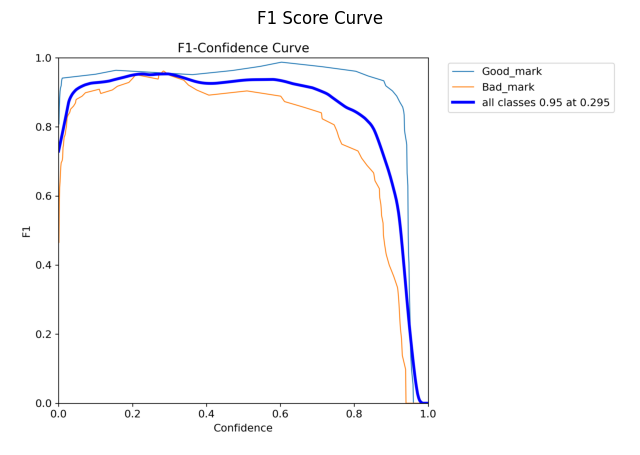

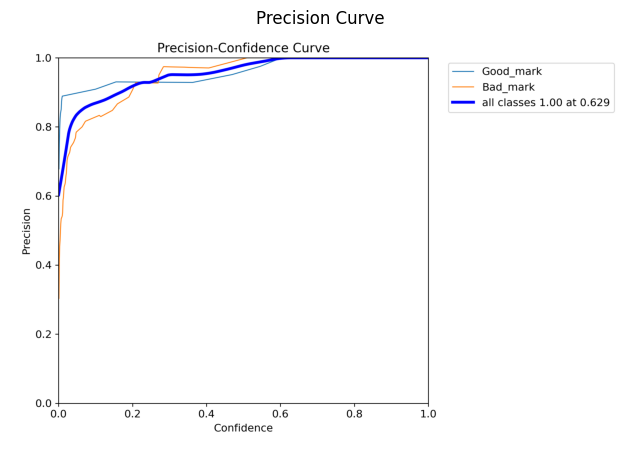

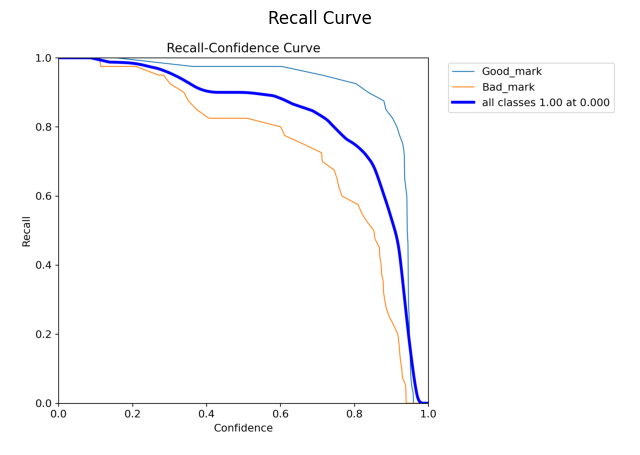

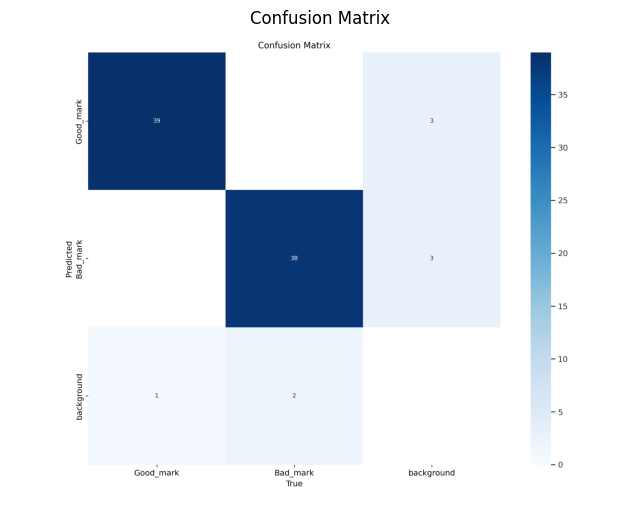

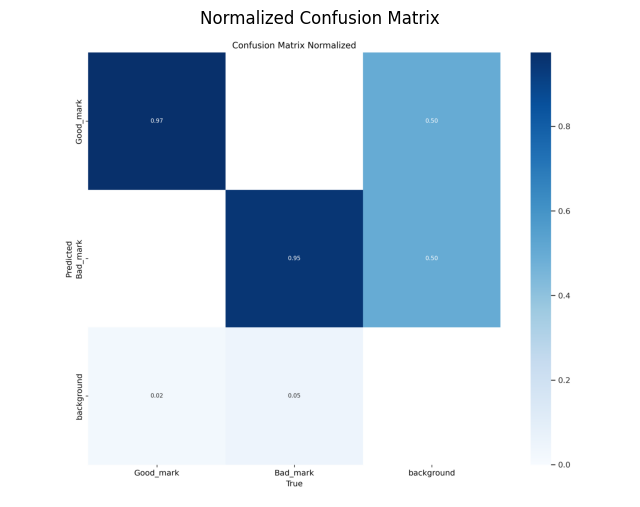

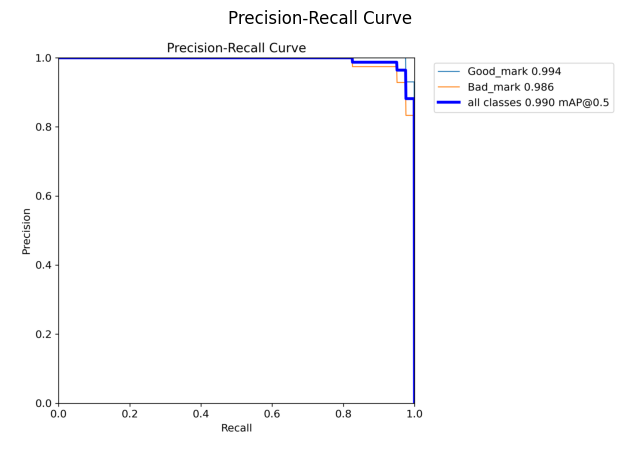

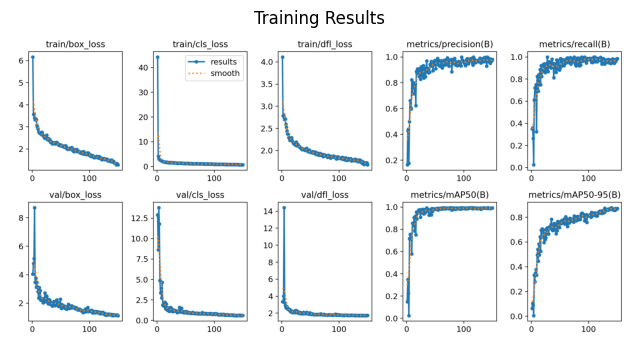

                     epoch           train/box_loss           train/cls_loss  \
0                        1                   6.1683                  44.2790   
1                        2                   3.5700                   4.1370   
2                        3                   3.5880                   3.1397   
3                        4                   3.4097                   2.8730   
4                        5                   3.3225                   2.6476   

            train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
0                   4.1124                  0.16412                  0.35000   
1                   2.7891                  0.42900                  0.36033   
2                   2.7923                  0.44109                  0.26250   
3                   2.7525                  0.17651                  0.02500   
4                   2.7010                  0.49884                  0.61250   

          metrics/mAP50(B)      metric

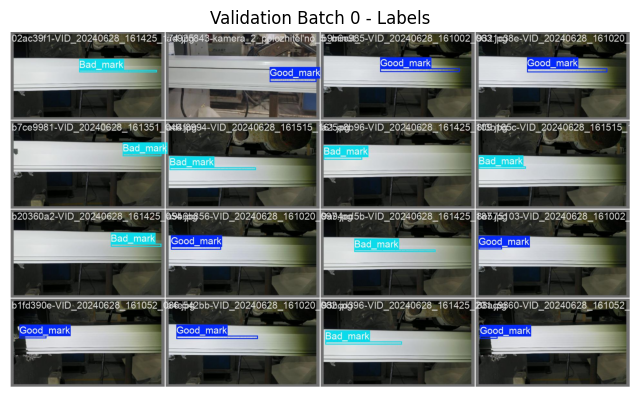

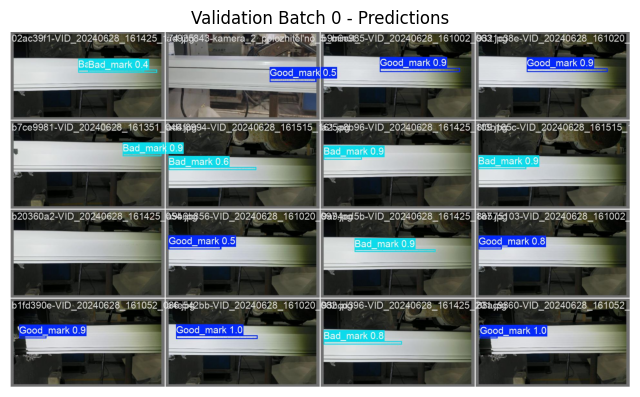

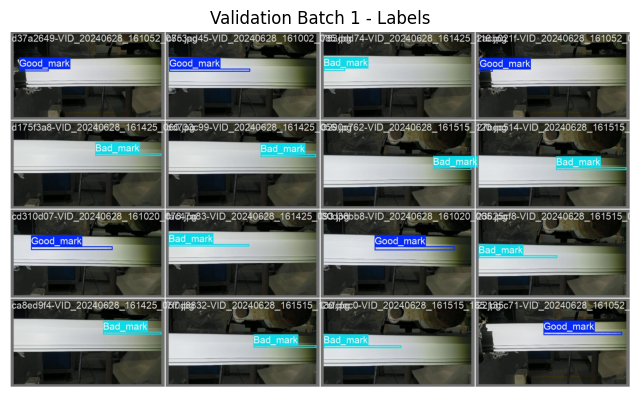

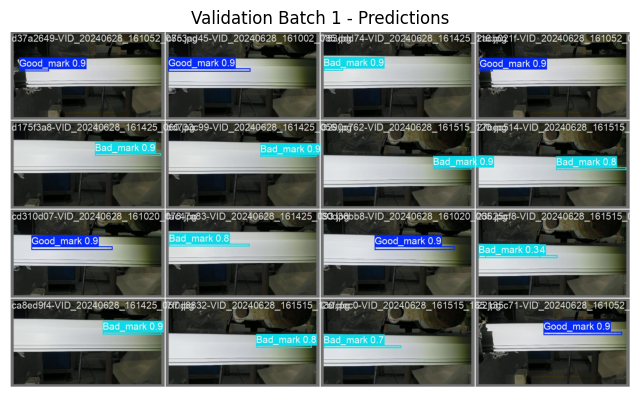

In [ ]:
# Путь к папке с результатами
results_dir = '/content/drive/MyDrive/Обучение Yolo_mark/Marking2'

# Функция для отображения изображений
def display_image(image_path, title=None):
    image = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()

# 1. Визуализация графиков (F1, Precision, Recall, Confusion Matrix)
graphs = {
    "F1_curve.png": "F1 Score Curve",
    "P_curve.png": "Precision Curve",
    "R_curve.png": "Recall Curve",
    "confusion_matrix.png": "Confusion Matrix",
    "confusion_matrix_normalized.png": "Normalized Confusion Matrix",
    "PR_curve.png": "Precision-Recall Curve",
    "results.png": "Training Results"
}

for file_name, title in graphs.items():
    image_path = os.path.join(results_dir, file_name)
    if os.path.exists(image_path):
        display_image(image_path, title)

# 2. Визуализация метрик из файла results.csv
results_csv_path = os.path.join(results_dir, 'results.csv')
if os.path.exists(results_csv_path):
    # Чтение CSV-файла с метриками
    df = pd.read_csv(results_csv_path)

    # Выводим первые несколько строк данных для ознакомления
    print(df.head())

# 3. Визуализация предсказаний на валидационном наборе
validation_results = {
    "val_batch0_labels.jpg": "Validation Batch 0 - Labels",
    "val_batch0_pred.jpg": "Validation Batch 0 - Predictions",
    "val_batch1_labels.jpg": "Validation Batch 1 - Labels",
    "val_batch1_pred.jpg": "Validation Batch 1 - Predictions",
}

for file_name, title in validation_results.items():
    image_path = os.path.join(results_dir, file_name)
    if os.path.exists(image_path):
        display_image(image_path, title)

Available columns in the results data:
Index(['                  epoch', '         train/box_loss',
       '         train/cls_loss', '         train/dfl_loss',
       '   metrics/precision(B)', '      metrics/recall(B)',
       '       metrics/mAP50(B)', '    metrics/mAP50-95(B)',
       '           val/box_loss', '           val/cls_loss',
       '           val/dfl_loss', '                 lr/pg0',
       '                 lr/pg1', '                 lr/pg2'],
      dtype='object')


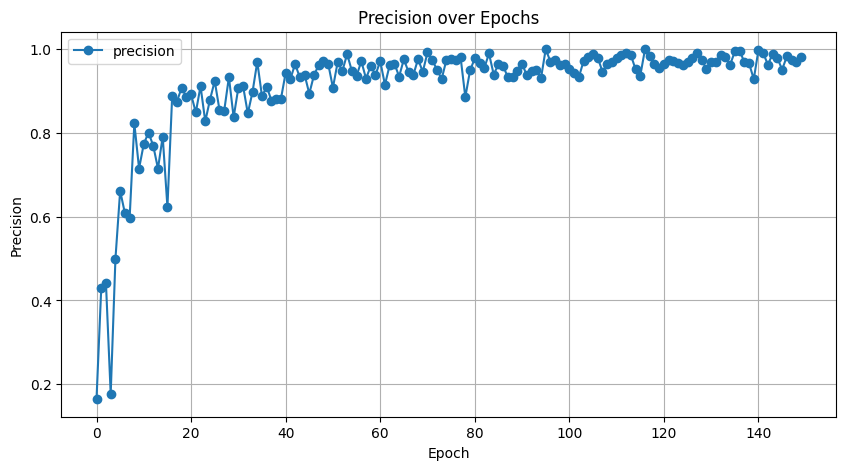

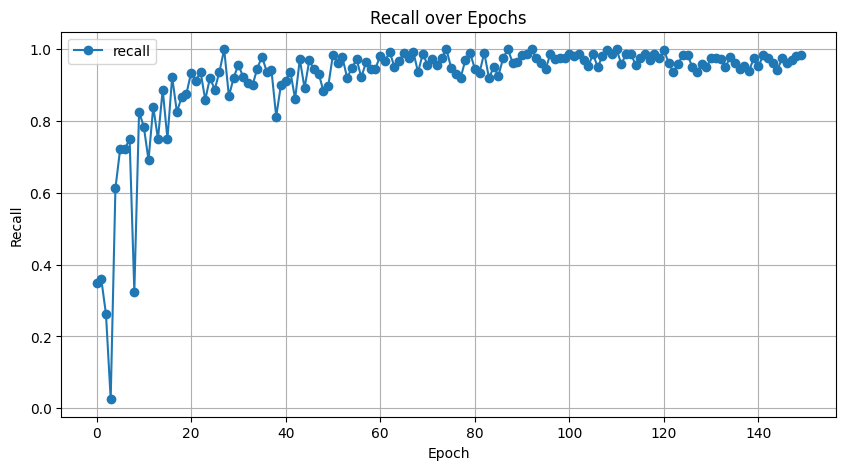

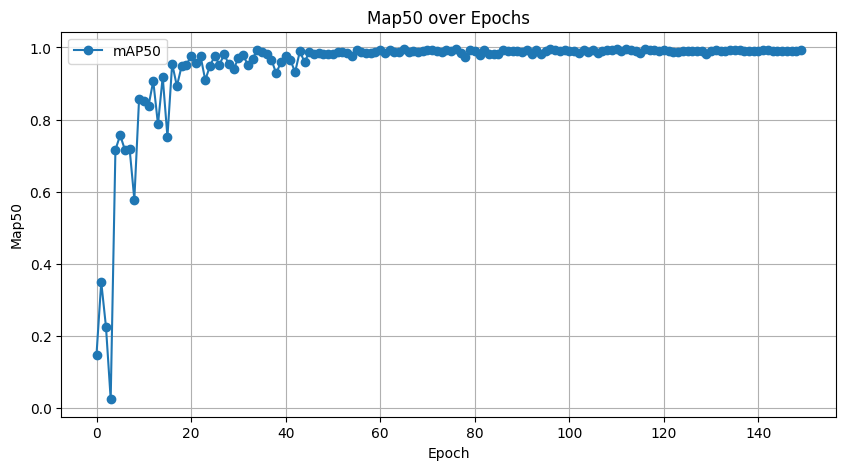

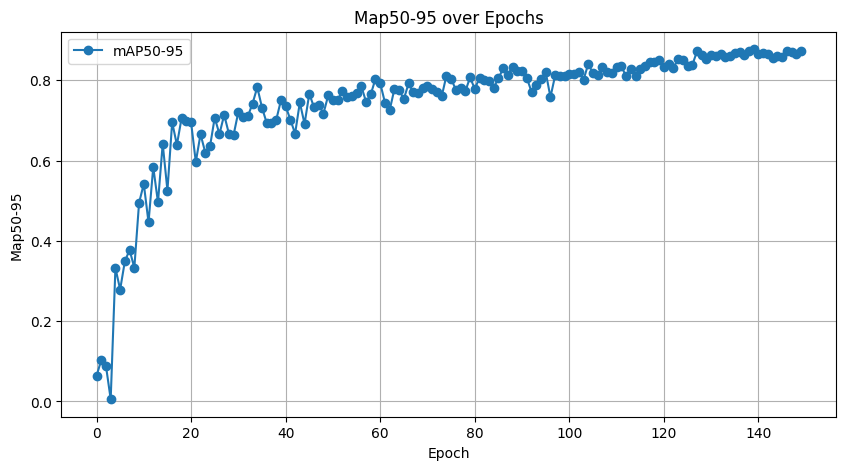

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Путь к файлу с результатами обучения
results_csv_path = '/content/drive/MyDrive/Обучение Yolo_mark/Marking2/results.csv'

# Проверка существования файла и чтение данных
if os.path.exists(results_csv_path):
    # Чтение данных из CSV-файла
    df = pd.read_csv(results_csv_path)

    # Вывод всех доступных колонок в таблице
    print("Available columns in the results data:")
    print(df.columns)

    # Переименуем столбцы для удобства
    df.columns = [col.strip() for col in df.columns]

    # Доступные метрики для визуализации
    plot_metrics = {
        'precision': 'metrics/precision(B)',
        'recall': 'metrics/recall(B)',
        'mAP50': 'metrics/mAP50(B)',
        'mAP50-95': 'metrics/mAP50-95(B)'
    }

    # Фильтрация и визуализация доступных метрик
    for metric_name, column_name in plot_metrics.items():
        if column_name in df.columns:
            plt.figure(figsize=(10, 5))
            plt.plot(df.index, df[column_name], label=metric_name, marker='o')
            plt.xlabel('Epoch')
            plt.ylabel(metric_name.capitalize())
            plt.title(f'{metric_name.capitalize()} over Epochs')
            plt.grid(True)
            plt.legend()
            plt.show()
        else:
            print(f"Metric '{metric_name}' not found in the data.")
else:
    print("Results CSV file not found.")


In [ ]:
print("Заголовки столбцов:")
print(df.columns)


Заголовки столбцов:
Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


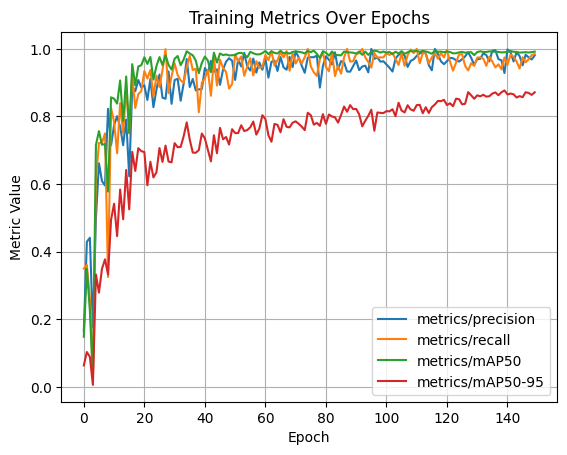

In [ ]:
metrics = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

# Замена названий метрик на более простые
cleaned_columns = {col: col.replace('(B)', '').strip() for col in df.columns}
df.rename(columns=cleaned_columns, inplace=True)

for metric in metrics:
    cleaned_metric = metric.replace('(B)', '').strip()
    if cleaned_metric in df.columns:
        plt.plot(df.index, df[cleaned_metric], label=cleaned_metric)
    else:
        print(f"Метрика '{cleaned_metric}' не найдена в файле.")

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('Training Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()


Модель YOLO: YOLOv10s
Количество эпох: 150
Точность: 0.9810
mAP50: 0.9921
Количество изображений в валидационной выборке: 79


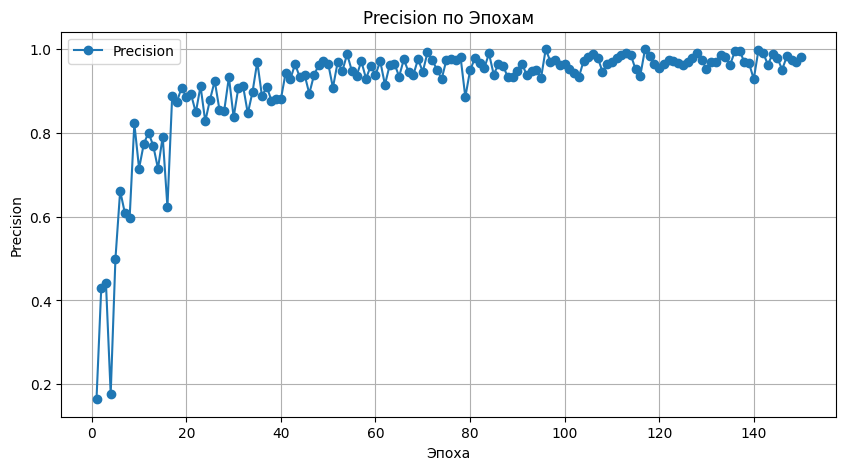

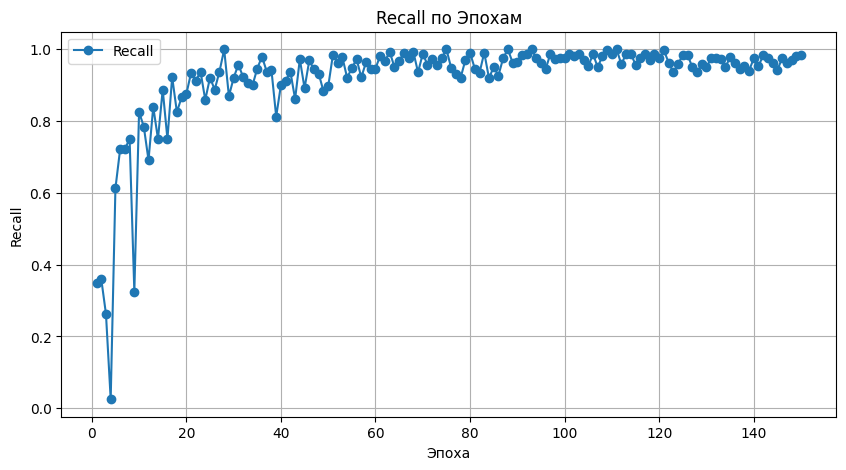

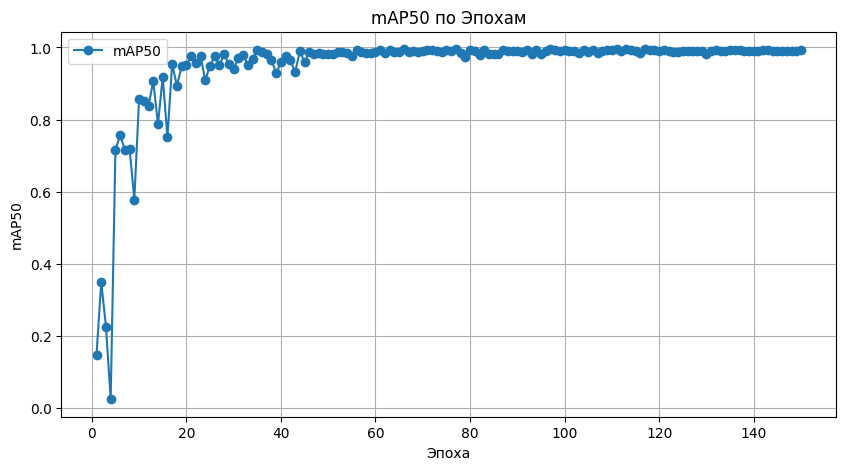

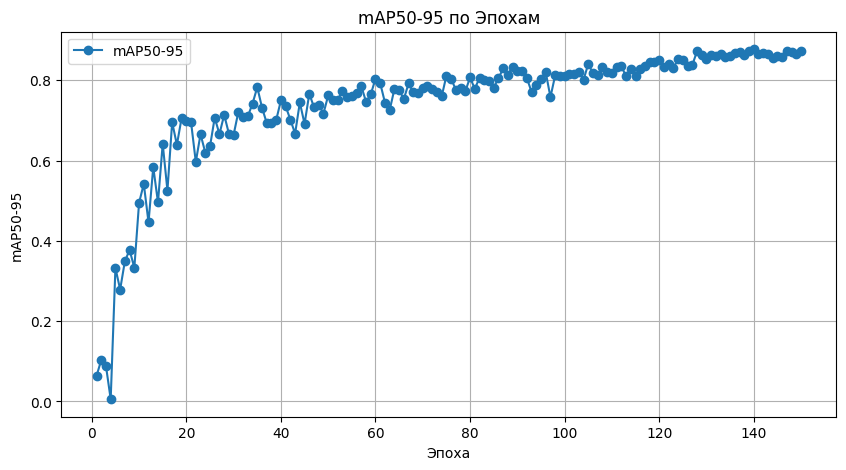

In [ ]:
# Путь к папке с результатами
results_dir = '/content/drive/MyDrive/Обучение Yolo_mark/Marking2'

# 1. Выводим имя модели YOLO
model_name = 'YOLOv10s'
print(f"Модель YOLO: {model_name}")

# 2. Чтение данных о метриках из файла results.csv
results_csv_path = os.path.join(results_dir, 'results.csv')

if os.path.exists(results_csv_path):
    # Чтение данных из CSV-файла
    df = pd.read_csv(results_csv_path)

    # Переименовываем колонки для удобства
    df.columns = [col.strip() for col in df.columns]

    # 3. Определяем количество эпох
    epochs = len(df)
    print(f"Количество эпох: {epochs}")

    # 4. Точность и mAP50
    precision_column = 'metrics/precision(B)'
    mAP50_column = 'metrics/mAP50(B)'

    if precision_column in df.columns and mAP50_column in df.columns:
        last_precision = df[precision_column].iloc[-1]
        last_mAP50 = df[mAP50_column].iloc[-1]
        print(f"Точность: {last_precision:.4f}")
        print(f"mAP50: {last_mAP50:.4f}")
    else:
        print("Не удалось найти колонки с precision и mAP50 в данных.")

    # 5. Количество изображений в валидационной выборке
    VAL_IMAGES_PATH = os.path.join(DATASET_PATH, 'val', 'images')  # Путь к валидационным изображениям

    if os.path.exists(VAL_IMAGES_PATH):
        VAL_IMAGES = len([file for file in os.listdir(VAL_IMAGES_PATH) if file.endswith(('.jpg', '.png'))])
        print(f"Количество изображений в валидационной выборке: {VAL_IMAGES}")
    else:
        print(f"Путь к валидационной выборке не найден: {VAL_IMAGES_PATH}")

    # Графики для визуализации метрик по эпохам
    metrics = {
        'Precision': 'metrics/precision(B)',
        'Recall': 'metrics/recall(B)',
        'mAP50': 'metrics/mAP50(B)',
        'mAP50-95': 'metrics/mAP50-95(B)'
    }

    for metric_name, column_name in metrics.items():
        if column_name in df.columns:
            plt.figure(figsize=(10, 5))
            plt.plot(df.index + 1, df[column_name], label=metric_name, marker='o')
            plt.xlabel('Эпоха')
            plt.ylabel(metric_name)
            plt.title(f'{metric_name} по Эпохам')
            plt.grid(True)
            plt.legend()
            plt.show()
        else:
            print(f"Метрика '{metric_name}' не найдена в данных.")
else:
    print(f"Файл {results_csv_path} не найден.")
